## Classification-Guided Encoding MNIST

In [1]:
import torch
import argparse
import MNIST_122   
device = "cuda" if torch.cuda.is_available() else "cpu"
args = argparse.Namespace(
    data_path="../data",
    batch_size=128,
    latent_dim=128,
    device=device
)

# Architecture Reasoning

---

## 1. Data Loading

### What We Do:
- Use **MNIST** dataset (28×28 grayscale images, 10 classes).
- Apply only **ToTensor()** for preprocessing.
- Data split: 80% train, 10% val, 10% test.

### Why It Helps:
- MNIST is clean and simple, so no heavy augmentations are needed.
- `ToTensor()` converts images to the right format and scale for PyTorch models.

---

## 2. Encoder Model

### Layer Breakdown:
1. **Conv Layer 1 (1 → 16 channels)**  
   - Stride 2, kernel size 3  
   - Reduces size to 14×14  
   - ReLU for non-linearity  

2. **Conv Layer 2 (16 → 32 channels)**  
   - Another stride-2 conv layer  
   - Down to 7×7  
   - Learns more abstract features  

3. **Linear Layer to Latent Space (32×7×7 → 128)**  
   - Flattens and reduces dimensionality  
   - Outputs latent feature vector

### Why It Works:
- Simple architecture fits the MNIST dataset well.
- Latent space is compact but expressive enough for digit classification.

---

## 3. Classifier Model

### What It Looks Like:
- Fully connected layers:  
  - `128 → 64 → 10`  
  - ReLU + Dropout(0.2) in between

### Why It Works:
- Lightweight and fast to train  
- Dropout helps avoid overfitting  
- Sufficient for clean MNIST latent space

---

## 4. Training Setup

| Component            | Value         | Why It Works                      |
|----------------------|---------------|-----------------------------------|
| Loss Function        | CrossEntropy  | Standard for classification       |
| Optimizer            | Adam          | Fast convergence and stability    |
| Batch Size           | args.batch_size | Flexible per GPU memory         |
| Epochs               | 15            | Enough to converge on MNIST       |
| Learning Rate        | 0.001         | Works well with Adam              |

---

## 5. Training Loop Logic

### Per Epoch:
- Forward pass through encoder + classifier  
- Backprop for both models  
- Track accuracy and loss  
- Validate after each epoch  

### Why It’s Good:
- Keeps training and validation performance visible  
- Helps detect overfitting early  
- Modular and reusable design

---


In [2]:
train_loader, val_loader, test_loader = MNIST_122.load_data(args)
encoder_model = MNIST_122.Encoder(args.latent_dim).to(args.device)
classifier_model = MNIST_122.Classifier(args.latent_dim).to(args.device)

## Training Autoencoder Classifier

Epoch [1/30], Train Loss: 0.4657, Train Acc: 85.19%, Val Loss: 0.1544, Val Acc: 95.28%, Test Loss: 0.1380, Test Acc: 95.68%


Epoch [2/30], Train Loss: 0.1405, Train Acc: 95.75%, Val Loss: 0.0909, Val Acc: 97.13%, Test Loss: 0.0774, Test Acc: 97.62%


Epoch [3/30], Train Loss: 0.0916, Train Acc: 97.30%, Val Loss: 0.0818, Val Acc: 97.32%, Test Loss: 0.0695, Test Acc: 97.68%


Epoch [4/30], Train Loss: 0.0731, Train Acc: 97.75%, Val Loss: 0.0654, Val Acc: 97.91%, Test Loss: 0.0548, Test Acc: 98.17%


Epoch [5/30], Train Loss: 0.0589, Train Acc: 98.12%, Val Loss: 0.0634, Val Acc: 98.18%, Test Loss: 0.0512, Test Acc: 98.39%


Epoch [6/30], Train Loss: 0.0547, Train Acc: 98.26%, Val Loss: 0.0568, Val Acc: 98.35%, Test Loss: 0.0465, Test Acc: 98.51%


Epoch [7/30], Train Loss: 0.0468, Train Acc: 98.55%, Val Loss: 0.0555, Val Acc: 98.32%, Test Loss: 0.0432, Test Acc: 98.55%


Epoch [8/30], Train Loss: 0.0415, Train Acc: 98.66%, Val Loss: 0.0561, Val Acc: 98.35%, Test Loss: 0.0460, Test Acc: 98.59%


Epoch [9/30], Train Loss: 0.0400, Train Acc: 98.69%, Val Loss: 0.0533, Val Acc: 98.45%, Test Loss: 0.0426, Test Acc: 98.50%


Epoch [10/30], Train Loss: 0.0346, Train Acc: 98.91%, Val Loss: 0.0597, Val Acc: 98.38%, Test Loss: 0.0446, Test Acc: 98.60%


Epoch [11/30], Train Loss: 0.0319, Train Acc: 98.95%, Val Loss: 0.0608, Val Acc: 98.46%, Test Loss: 0.0466, Test Acc: 98.65%


Epoch [12/30], Train Loss: 0.0304, Train Acc: 98.98%, Val Loss: 0.0692, Val Acc: 98.26%, Test Loss: 0.0519, Test Acc: 98.36%


Epoch [13/30], Train Loss: 0.0263, Train Acc: 99.15%, Val Loss: 0.0622, Val Acc: 98.28%, Test Loss: 0.0558, Test Acc: 98.39%


Epoch [14/30], Train Loss: 0.0266, Train Acc: 99.14%, Val Loss: 0.0567, Val Acc: 98.42%, Test Loss: 0.0445, Test Acc: 98.72%


Epoch [15/30], Train Loss: 0.0222, Train Acc: 99.25%, Val Loss: 0.0612, Val Acc: 98.57%, Test Loss: 0.0481, Test Acc: 98.53%


Epoch [16/30], Train Loss: 0.0208, Train Acc: 99.30%, Val Loss: 0.0549, Val Acc: 98.55%, Test Loss: 0.0468, Test Acc: 98.68%


Epoch [17/30], Train Loss: 0.0230, Train Acc: 99.27%, Val Loss: 0.0564, Val Acc: 98.67%, Test Loss: 0.0483, Test Acc: 98.67%


Epoch [18/30], Train Loss: 0.0194, Train Acc: 99.31%, Val Loss: 0.0603, Val Acc: 98.54%, Test Loss: 0.0481, Test Acc: 98.73%


Epoch [19/30], Train Loss: 0.0207, Train Acc: 99.27%, Val Loss: 0.0601, Val Acc: 98.59%, Test Loss: 0.0475, Test Acc: 98.63%


Epoch [20/30], Train Loss: 0.0175, Train Acc: 99.45%, Val Loss: 0.0663, Val Acc: 98.58%, Test Loss: 0.0513, Test Acc: 98.75%


Epoch [21/30], Train Loss: 0.0168, Train Acc: 99.38%, Val Loss: 0.0597, Val Acc: 98.55%, Test Loss: 0.0500, Test Acc: 98.64%


Epoch [22/30], Train Loss: 0.0145, Train Acc: 99.49%, Val Loss: 0.0559, Val Acc: 98.69%, Test Loss: 0.0487, Test Acc: 98.74%


Epoch [23/30], Train Loss: 0.0132, Train Acc: 99.54%, Val Loss: 0.0648, Val Acc: 98.69%, Test Loss: 0.0513, Test Acc: 98.67%


Epoch [24/30], Train Loss: 0.0149, Train Acc: 99.49%, Val Loss: 0.0678, Val Acc: 98.62%, Test Loss: 0.0600, Test Acc: 98.48%


Epoch [25/30], Train Loss: 0.0139, Train Acc: 99.50%, Val Loss: 0.0739, Val Acc: 98.49%, Test Loss: 0.0640, Test Acc: 98.45%


Epoch [26/30], Train Loss: 0.0144, Train Acc: 99.50%, Val Loss: 0.0742, Val Acc: 98.55%, Test Loss: 0.0616, Test Acc: 98.53%


Epoch [27/30], Train Loss: 0.0114, Train Acc: 99.60%, Val Loss: 0.0659, Val Acc: 98.75%, Test Loss: 0.0572, Test Acc: 98.68%


Epoch [28/30], Train Loss: 0.0102, Train Acc: 99.67%, Val Loss: 0.0711, Val Acc: 98.57%, Test Loss: 0.0589, Test Acc: 98.67%


Epoch [29/30], Train Loss: 0.0126, Train Acc: 99.57%, Val Loss: 0.0665, Val Acc: 98.54%, Test Loss: 0.0591, Test Acc: 98.73%


Epoch [30/30], Train Loss: 0.0095, Train Acc: 99.65%, Val Loss: 0.0705, Val Acc: 98.62%, Test Loss: 0.0566, Test Acc: 98.73%


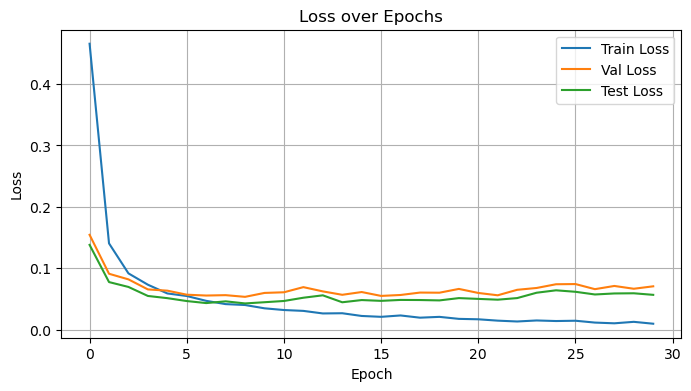

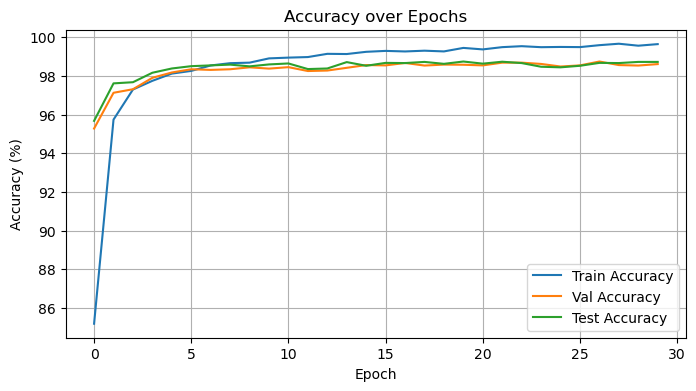

In [3]:
MNIST_122.train_encoder_classifier(encoder_model, classifier_model, train_loader, val_loader,test_loader,args, epochs=30)

## t-SNE Analysis of Latent Spaces

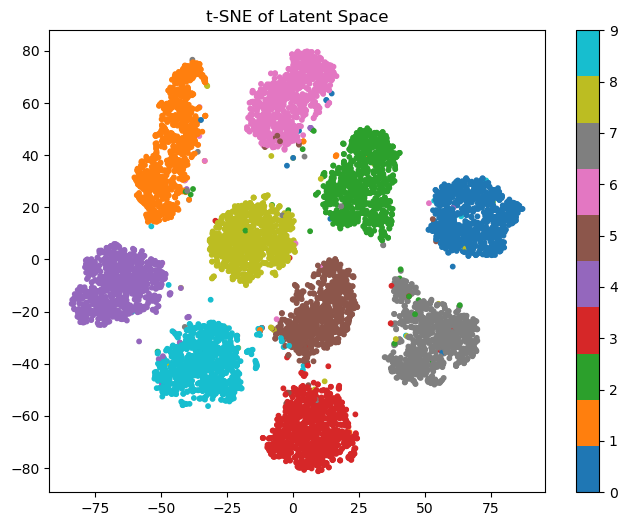

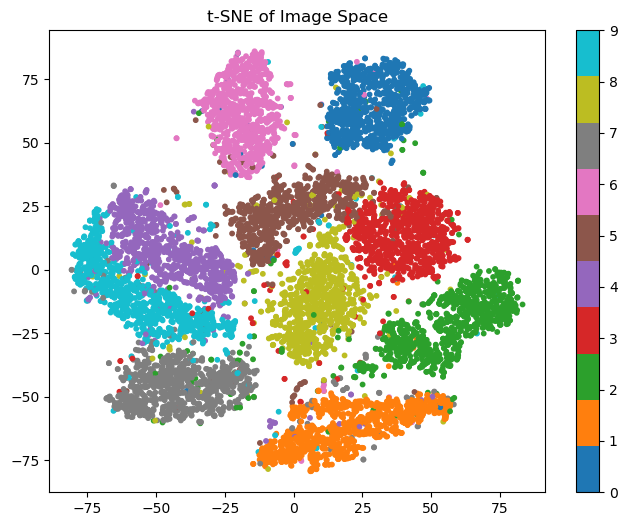

In [4]:
MNIST_122.plot_tsne(encoder_model, test_loader, args.device)